In [6]:
import os

import sys
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.models import Model,load_model

sys.path
sys.executable
%pip install mlxtend
%pip install streamlit
from keras.models import Model,load_model
from tensorflow.keras import optimizers
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.layers import BatchNormalization
from keras.preprocessing import image        # for image.load_img
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image  # to open image
from PIL import Image, ImageOps
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import itertools
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from matplotlib.pyplot import subplots


train_dir='C:\\Users\\hakim\\Documents\\skin detection2\\rps4'
test_dir='C:\\Users\\hakim\\Documents\\skin detection2\\rps4_test'
val_dir     ='C:\\Users\\hakim\\Documents\\skin detection2\\rps4_val'

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def image_gen_w_aug(train_dir, test_dir,val_dir):
    
    train_datagen = ImageDataGenerator(rescale=1/255,
                                      rotation_range = 30, 
                                      featurewise_center=True,
                                      samplewise_center=False,
                                      featurewise_std_normalization=True,
                                      samplewise_std_normalization=False,
                                      zca_whitening=False,
                                      vertical_flip=False,
                                      zoom_range = 0.2, 
                                      width_shift_range=0.1,  
                                      height_shift_range=0.1,
                                      horizontal_flip=True,
                                      validation_split = 0.15,)
    
    
    
    test_datagen = ImageDataGenerator(rescale=1/255)
    
    
    test_generator = test_datagen.flow_from_directory(test_dir,
                                 target_size=(229,229),
                                 batch_size = 10,
                                 class_mode = 'categorical',
                                 shuffle=False)
    #test_set = test_datagen.flow_from_directory(train_parent_directory,
                #target_size = (229,229),
                #batch_size = 8,
                #class_mode = 'categorical')
    
    train_generator =          train_datagen.flow_from_directory(train_dir,
                                  target_size = (229,229),
                                  batch_size = 10,
                                  class_mode = 'categorical',
                                  subset='training')
    
    val_generator = train_datagen.flow_from_directory(val_dir,
                                  target_size = (229,229),
                                  batch_size = 10,
                                  class_mode = 'categorical',
                                  subset = 'validation')
    
    return train_generator, val_generator, test_generator

In [8]:
train_generator, val_generator, test_generator = image_gen_w_aug(train_dir, test_dir, val_dir)

Found 52 images belonging to 4 classes.
Found 356 images belonging to 4 classes.
Found 4 images belonging to 4 classes.


In [9]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Flatten, Dense, Dropout
def model_output_for_TL4 (pre_trained_model, last_output):    
    x = Flatten()(last_output)
    
    # Dense hidden layer
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.2)(x)
    
    # Output neuron. 
    x = Dense(4, activation='softmax')(x)
    
    model = Model(pre_trained_model.input, x)
    
    return model
pre_trained_model = InceptionV3(input_shape = (229, 229, 3), 
                                include_top = False, 
                                weights = 'imagenet')
for layer in pre_trained_model.layers:
  layer.trainable = False
last_layer = pre_trained_model.get_layer('mixed5')
last_output = last_layer.output
model_TL4 = model_output_for_TL4(pre_trained_model, last_output)

In [10]:
from sklearn import metrics   #confusion matrix


ypred_test = model_TL4.predict_generator(test_generator)
ypred_test = np.argmax(ypred_test, axis=1)
Y_pred = model_TL4.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
score_test = metrics.accuracy_score(test_generator.classes, ypred_test)
print("Test accuracy:   %0.3f" % score_test)

<ipython-input-10-2530ef70abfa>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  ypred_test = model_TL4.predict_generator(test_generator)
<ipython-input-10-2530ef70abfa>:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model_TL4.predict_generator(test_generator)


Test accuracy:   0.308


In [11]:
target_names = []
for key in test_generator.class_indices:
    target_names.append(key)
print(target_names)
cm = metrics.confusion_matrix(test_generator.classes+1, ypred_test+1)
#fig, ax = plt.subplots(figsize=(20, 20))             

['CP', 'HFMD', 'HR', 'HZ']


In [12]:
#plot_confusion_matrix(cm,classes=[0,1,2,3])
#plot_confusion_matrix(test_generator.classes, y_pred,target_names)
#plot_confusion_matrix(cm,target_names)  

In [13]:
#plot_confusion_matrix(cm, figsize=(20, 20))
print('Testing')

Testing


In [14]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

#test_labels = train_generator.classes
#test_labels
train_generator.class_indices

{'CP': 0, 'HFMD': 1, 'HR': 2, 'HZ': 3}

In [15]:
model_TL4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_TL4 = model_TL4.fit(
      train_generator,
      steps_per_epoch=20,  
      epochs=30,
      verbose=1,
      validation_steps = 10,
      validation_data = val_generator)
tf.keras.models.save_model(model_TL4,'my_model4.hdf5')
print('Test accuracy:', model_TL4.evaluate(train_generator))


C:\ANACONDA\lib\site-packages\keras\preprocessing\image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
C:\ANACONDA\lib\site-packages\keras\preprocessing\image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/30
20/20 [==============================] - 26s 1s/step - loss: 24.5708 - accuracy: 0.3100 - val_loss: 14.6858 - val_accuracy: 0.2500
Epoch 2/30
20/20 [==============================] - 21s 1s/step - loss: 6.5973 - accuracy: 0.4700
Epoch 3/30
20/20 [==============================] - 21s 1s/step - loss: 2.8176 - accuracy: 0.5561
Epoch 4/30
20/20 [==============================] - 21s 1s/step - loss: 1.0990 - accuracy: 0.6735
Epoch 5/30
20/20 [==============================] - 21s 1s/step - loss: 0.6131 - accuracy: 0.7200
Epoch 6/30
20/20 [==============================] - 21s 1s/step - loss: 0.6485 - accuracy: 0.7700
Epoch 7/30
20/20 [==============================] - 21s 1s/step - loss: 0.7239 - accuracy: 0.7143
Epoch 8/30
20/20 [==============================] - 22s 1s/step - loss: 0.5312 - accuracy: 0.7850
Epoch 9/30
20/20 [==============================] - 22s 1s/step - loss: 0.4131 - accuracy: 0.8500
Epoch 10/30
20/20 [==============================] - 23s 1s/step - loss: 0

In [11]:
class_pred=model_TL4.predict(train_generator,batch_size=8)
print(class_pred[0])

36/36 [==============================] - 26s 667ms/step
[5.3302654e-05 3.1105326e-17 9.3637800e-01 6.3568614e-02]


In [12]:
#testing one images prediction

%pip install tf-nightly
%pip install tensorflow keras --upgrade
import numpy as np
from keras.preprocessing import image
from keras.utils import image_utils
test_image = image_utils.load_img('bin3/bin4/HR(160).jpg', target_size = (229, 229))
test_image = image_utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result =model_TL4.predict(test_image)
print(train_generator.class_indices)
print(result)


if result[0][0] == 1:
    prediction = 'CP'
elif result[0][0] == 2:
    prediction = 'HFMD'
elif result[0][0] == 3:
    prediction = 'HR'
else:
    prediction = 'HZ'
print(prediction)

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


1/1 [==============================] - 1s 1s/step
{'CP': 0, 'HFMD': 1, 'HR': 2, 'HZ': 3}
[[1. 0. 0. 0.]]
CP


In [13]:
%pip install tensorflow keras --upgrade
%pip install tf-nightly
%pip install --upgrade tensorflow
%pip install --upgrade pip

from tensorflow.keras.utils import load_img
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import img_to_array
from PIL import Image
#from keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing import image

    





def classify(img_file):
    img_name = img_file
    test_generator = image.load_img(img_name, target_size = (229, 229,3)) # load image from Keras
    
    
    
    test_generator = image.img_to_array(test_generator)       # convert to Numpy array from Keras
    test_generator = np.expand_dims(test_generator, axis=0)   # expand dimension to (1, x,y) where x and y are ori dimension of image
    result = model_TL4.predict(test_generator)
    #print('result=',result)      # here 2 values
    arr = np.array(result[0])    # the first value of results
    #print(arr)                   # same output with result got 2 values
    maxx = np.amax(arr)
    print('Max =',maxx)           # find max value of arr
    max_prob = arr.argmax(axis=0)
    print('Max location =',max_prob)  # find loacation of max prob of the second value
    proba = arr[max_prob]         # equal to maxx
    print('Proba=',proba)
    classs=["0", "1","2","3"]
    if result[0][0] == 1:
        prediction = 'CP'
    elif result[0][0] == 2:
        prediction = 'HFMD'
    elif result[0][0] == 3:
        prediction = 'HR'
    else:
        prediction = 'HZ'
    
    
    #if maxx < 0.5:
      #print(img_name,'-> Unknown')
    #else:
          #results = classs[max_prob + 1]
          #print(img_name,'->',results)
    #if max== 0:
        #print(img_name,'->Chickenpox')
    #elif max== 1:
         #print(img_name,'->Heat Rash')
    #elif max==  2:
        #print(img_name,'->Herpes Zoster')
    #else:
        #print(img_name,'->HFMD')
    
     #if maxx < 0.5:
     # print(img_name,'-> Unknown')
    #max_prob = max_prob + 1
    #print('Max prob +1 =',max_prob)
    #classs=["0", "1","2","3"]
    #classes=["Deseased", "Healthy"]  # can also
     #else:
          #results = classs[max_prob + 1]
          #print(img_name,'->',results)
        
   

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [14]:
%pip install tensorflow keras --upgrade
%pip install tf-nightly
%pip install --upgrade tensorflow
from tensorflow.keras.utils import load_img
import tensorflow as tf
from tensorflow.keras.utils import load_img
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import np_utils
from keras.utils import image_utils 
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import os

import tensorflow.keras.utils as load_img
import keras.preprocessing as load_img
import tensorflow as load_img
import tensorflow.keras as load_img
import keras.utils as load_img
import keras as load_img
#import np_utils as load_img
#import image_utils as load_img
import tensorflow.keras.models as load_img
import numpy

result = model_TL4.predict(test_generator)



path = 'C:\\Users\\hakim\\Documents\\skin detection2\\rps4_test'
files = []
#r=root, d=directories, f = files
for r, d, f in os.walk(path):
   for file in f:
     if '.jpg' in file:
       
       files.append(os.path.join(r, file))

classs=train_generator.class_indices

classs=['CP', 'HFMD', 'HR', 'HZ']
from tensorflow.keras.utils import load_img       # for image.load_img

for f in files:
       classify(f)
       print('\n',)
       print( test_generator)
       print(result)

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


^C
Note: you may need to restart the kernel to use updated packages.
1/1 [==============================] - 0s 84ms/step
Max = 1.0
Max location = 0
Proba= 1.0


[[2.1400029e-04 7.5515796e-05 4.7039686e-12 9.9971038e-01]
 [8.1155699e-01 1.6320785e-06 2.9939017e-11 1.8844134e-01]
 [9.9991727e-01 8.7499984e-07 4.6252911e-11 8.1845072e-05]
 [9.9982601e-01 1.7379814e-04 3.6085013e-11 2.4494287e-07]
 [1.0000000e+00 1.9774406e-10 5.7481342e-10 1.2708691e-10]
 [1.3651777e-06 7.9153034e-07 2.4360972e-16 9.9999785e-01]
 [1.0000000e+00 8.7544131e-18 2.2806305e-14 1.5772597e-14]
 [1.0000000e+00 1.9758002e-14 5.6127197e-10 2.6324081e-08]
 [1.3509602e-05 2.6917931e-07 2.8899028e-09 9.9998629e-01]
 [9.9999988e-01 6.6613588e-16 3.3900351e-15 7.8928380e-08]
 [1.0000000e+00 3.8247527e-11 5.8619309e-10 7.3540130e-09]
 [1.0000000e+00 7.1300090e-17 1.8386608e-11 7.7262458e-10]
 [1.0220348e-03 4.8265341e-12 3.7178416e-10 9.9897802e-01]
 [1.8972915e-01 1.4129259e-05 4.0261059e-13 8.1025672e-01]
 [1.5662488e-

1/1 [==============================] - 0s 115ms/step
Max = 1.0
Max location = 0
Proba= 1.0


[[2.1400029e-04 7.5515796e-05 4.7039686e-12 9.9971038e-01]
 [8.1155699e-01 1.6320785e-06 2.9939017e-11 1.8844134e-01]
 [9.9991727e-01 8.7499984e-07 4.6252911e-11 8.1845072e-05]
 [9.9982601e-01 1.7379814e-04 3.6085013e-11 2.4494287e-07]
 [1.0000000e+00 1.9774406e-10 5.7481342e-10 1.2708691e-10]
 [1.3651777e-06 7.9153034e-07 2.4360972e-16 9.9999785e-01]
 [1.0000000e+00 8.7544131e-18 2.2806305e-14 1.5772597e-14]
 [1.0000000e+00 1.9758002e-14 5.6127197e-10 2.6324081e-08]
 [1.3509602e-05 2.6917931e-07 2.8899028e-09 9.9998629e-01]
 [9.9999988e-01 6.6613588e-16 3.3900351e-15 7.8928380e-08]
 [1.0000000e+00 3.8247527e-11 5.8619309e-10 7.3540130e-09]
 [1.0000000e+00 7.1300090e-17 1.8386608e-11 7.7262458e-10]
 [1.0220348e-03 4.8265341e-12 3.7178416e-10 9.9897802e-01]
 [1.8972915e-01 1.4129259e-05 4.0261059e-13 8.1025672e-01]
 [1.5662488e-09 4.2450873e-07 4.5949312e-18 9.9999952e-01]
 [6.5998524e-14 1.0000

1/1 [==============================] - 0s 125ms/step
Max = 1.0
Max location = 0
Proba= 1.0


[[2.1400029e-04 7.5515796e-05 4.7039686e-12 9.9971038e-01]
 [8.1155699e-01 1.6320785e-06 2.9939017e-11 1.8844134e-01]
 [9.9991727e-01 8.7499984e-07 4.6252911e-11 8.1845072e-05]
 [9.9982601e-01 1.7379814e-04 3.6085013e-11 2.4494287e-07]
 [1.0000000e+00 1.9774406e-10 5.7481342e-10 1.2708691e-10]
 [1.3651777e-06 7.9153034e-07 2.4360972e-16 9.9999785e-01]
 [1.0000000e+00 8.7544131e-18 2.2806305e-14 1.5772597e-14]
 [1.0000000e+00 1.9758002e-14 5.6127197e-10 2.6324081e-08]
 [1.3509602e-05 2.6917931e-07 2.8899028e-09 9.9998629e-01]
 [9.9999988e-01 6.6613588e-16 3.3900351e-15 7.8928380e-08]
 [1.0000000e+00 3.8247527e-11 5.8619309e-10 7.3540130e-09]
 [1.0000000e+00 7.1300090e-17 1.8386608e-11 7.7262458e-10]
 [1.0220348e-03 4.8265341e-12 3.7178416e-10 9.9897802e-01]
 [1.8972915e-01 1.4129259e-05 4.0261059e-13 8.1025672e-01]
 [1.5662488e-09 4.2450873e-07 4.5949312e-18 9.9999952e-01]
 [6.5998524e-14 1.0000

1/1 [==============================] - 0s 138ms/step
Max = 1.0
Max location = 0
Proba= 1.0


[[2.1400029e-04 7.5515796e-05 4.7039686e-12 9.9971038e-01]
 [8.1155699e-01 1.6320785e-06 2.9939017e-11 1.8844134e-01]
 [9.9991727e-01 8.7499984e-07 4.6252911e-11 8.1845072e-05]
 [9.9982601e-01 1.7379814e-04 3.6085013e-11 2.4494287e-07]
 [1.0000000e+00 1.9774406e-10 5.7481342e-10 1.2708691e-10]
 [1.3651777e-06 7.9153034e-07 2.4360972e-16 9.9999785e-01]
 [1.0000000e+00 8.7544131e-18 2.2806305e-14 1.5772597e-14]
 [1.0000000e+00 1.9758002e-14 5.6127197e-10 2.6324081e-08]
 [1.3509602e-05 2.6917931e-07 2.8899028e-09 9.9998629e-01]
 [9.9999988e-01 6.6613588e-16 3.3900351e-15 7.8928380e-08]
 [1.0000000e+00 3.8247527e-11 5.8619309e-10 7.3540130e-09]
 [1.0000000e+00 7.1300090e-17 1.8386608e-11 7.7262458e-10]
 [1.0220348e-03 4.8265341e-12 3.7178416e-10 9.9897802e-01]
 [1.8972915e-01 1.4129259e-05 4.0261059e-13 8.1025672e-01]
 [1.5662488e-09 4.2450873e-07 4.5949312e-18 9.9999952e-01]
 [6.5998524e-14 1.0000

1/1 [==============================] - 0s 106ms/step
Max = 1.0
Max location = 0
Proba= 1.0


[[2.1400029e-04 7.5515796e-05 4.7039686e-12 9.9971038e-01]
 [8.1155699e-01 1.6320785e-06 2.9939017e-11 1.8844134e-01]
 [9.9991727e-01 8.7499984e-07 4.6252911e-11 8.1845072e-05]
 [9.9982601e-01 1.7379814e-04 3.6085013e-11 2.4494287e-07]
 [1.0000000e+00 1.9774406e-10 5.7481342e-10 1.2708691e-10]
 [1.3651777e-06 7.9153034e-07 2.4360972e-16 9.9999785e-01]
 [1.0000000e+00 8.7544131e-18 2.2806305e-14 1.5772597e-14]
 [1.0000000e+00 1.9758002e-14 5.6127197e-10 2.6324081e-08]
 [1.3509602e-05 2.6917931e-07 2.8899028e-09 9.9998629e-01]
 [9.9999988e-01 6.6613588e-16 3.3900351e-15 7.8928380e-08]
 [1.0000000e+00 3.8247527e-11 5.8619309e-10 7.3540130e-09]
 [1.0000000e+00 7.1300090e-17 1.8386608e-11 7.7262458e-10]
 [1.0220348e-03 4.8265341e-12 3.7178416e-10 9.9897802e-01]
 [1.8972915e-01 1.4129259e-05 4.0261059e-13 8.1025672e-01]
 [1.5662488e-09 4.2450873e-07 4.5949312e-18 9.9999952e-01]
 [6.5998524e-14 1.0000

1/1 [==============================] - 0s 117ms/step
Max = 1.0
Max location = 0
Proba= 1.0


[[2.1400029e-04 7.5515796e-05 4.7039686e-12 9.9971038e-01]
 [8.1155699e-01 1.6320785e-06 2.9939017e-11 1.8844134e-01]
 [9.9991727e-01 8.7499984e-07 4.6252911e-11 8.1845072e-05]
 [9.9982601e-01 1.7379814e-04 3.6085013e-11 2.4494287e-07]
 [1.0000000e+00 1.9774406e-10 5.7481342e-10 1.2708691e-10]
 [1.3651777e-06 7.9153034e-07 2.4360972e-16 9.9999785e-01]
 [1.0000000e+00 8.7544131e-18 2.2806305e-14 1.5772597e-14]
 [1.0000000e+00 1.9758002e-14 5.6127197e-10 2.6324081e-08]
 [1.3509602e-05 2.6917931e-07 2.8899028e-09 9.9998629e-01]
 [9.9999988e-01 6.6613588e-16 3.3900351e-15 7.8928380e-08]
 [1.0000000e+00 3.8247527e-11 5.8619309e-10 7.3540130e-09]
 [1.0000000e+00 7.1300090e-17 1.8386608e-11 7.7262458e-10]
 [1.0220348e-03 4.8265341e-12 3.7178416e-10 9.9897802e-01]
 [1.8972915e-01 1.4129259e-05 4.0261059e-13 8.1025672e-01]
 [1.5662488e-09 4.2450873e-07 4.5949312e-18 9.9999952e-01]
 [6.5998524e-14 1.0000

1/1 [==============================] - 0s 114ms/step
Max = 1.0
Max location = 0
Proba= 1.0


[[2.1400029e-04 7.5515796e-05 4.7039686e-12 9.9971038e-01]
 [8.1155699e-01 1.6320785e-06 2.9939017e-11 1.8844134e-01]
 [9.9991727e-01 8.7499984e-07 4.6252911e-11 8.1845072e-05]
 [9.9982601e-01 1.7379814e-04 3.6085013e-11 2.4494287e-07]
 [1.0000000e+00 1.9774406e-10 5.7481342e-10 1.2708691e-10]
 [1.3651777e-06 7.9153034e-07 2.4360972e-16 9.9999785e-01]
 [1.0000000e+00 8.7544131e-18 2.2806305e-14 1.5772597e-14]
 [1.0000000e+00 1.9758002e-14 5.6127197e-10 2.6324081e-08]
 [1.3509602e-05 2.6917931e-07 2.8899028e-09 9.9998629e-01]
 [9.9999988e-01 6.6613588e-16 3.3900351e-15 7.8928380e-08]
 [1.0000000e+00 3.8247527e-11 5.8619309e-10 7.3540130e-09]
 [1.0000000e+00 7.1300090e-17 1.8386608e-11 7.7262458e-10]
 [1.0220348e-03 4.8265341e-12 3.7178416e-10 9.9897802e-01]
 [1.8972915e-01 1.4129259e-05 4.0261059e-13 8.1025672e-01]
 [1.5662488e-09 4.2450873e-07 4.5949312e-18 9.9999952e-01]
 [6.5998524e-14 1.0000

1/1 [==============================] - 0s 95ms/step
Max = 1.0
Max location = 0
Proba= 1.0


[[2.1400029e-04 7.5515796e-05 4.7039686e-12 9.9971038e-01]
 [8.1155699e-01 1.6320785e-06 2.9939017e-11 1.8844134e-01]
 [9.9991727e-01 8.7499984e-07 4.6252911e-11 8.1845072e-05]
 [9.9982601e-01 1.7379814e-04 3.6085013e-11 2.4494287e-07]
 [1.0000000e+00 1.9774406e-10 5.7481342e-10 1.2708691e-10]
 [1.3651777e-06 7.9153034e-07 2.4360972e-16 9.9999785e-01]
 [1.0000000e+00 8.7544131e-18 2.2806305e-14 1.5772597e-14]
 [1.0000000e+00 1.9758002e-14 5.6127197e-10 2.6324081e-08]
 [1.3509602e-05 2.6917931e-07 2.8899028e-09 9.9998629e-01]
 [9.9999988e-01 6.6613588e-16 3.3900351e-15 7.8928380e-08]
 [1.0000000e+00 3.8247527e-11 5.8619309e-10 7.3540130e-09]
 [1.0000000e+00 7.1300090e-17 1.8386608e-11 7.7262458e-10]
 [1.0220348e-03 4.8265341e-12 3.7178416e-10 9.9897802e-01]
 [1.8972915e-01 1.4129259e-05 4.0261059e-13 8.1025672e-01]
 [1.5662488e-09 4.2450873e-07 4.5949312e-18 9.9999952e-01]
 [6.5998524e-14 1.00000

 [6.4936193e-04 6.2488710e-14 7.4160512e-06 9.9934322e-01]]
1/1 [==============================] - 0s 112ms/step
Max = 1.0
Max location = 0
Proba= 1.0


[[2.1400029e-04 7.5515796e-05 4.7039686e-12 9.9971038e-01]
 [8.1155699e-01 1.6320785e-06 2.9939017e-11 1.8844134e-01]
 [9.9991727e-01 8.7499984e-07 4.6252911e-11 8.1845072e-05]
 [9.9982601e-01 1.7379814e-04 3.6085013e-11 2.4494287e-07]
 [1.0000000e+00 1.9774406e-10 5.7481342e-10 1.2708691e-10]
 [1.3651777e-06 7.9153034e-07 2.4360972e-16 9.9999785e-01]
 [1.0000000e+00 8.7544131e-18 2.2806305e-14 1.5772597e-14]
 [1.0000000e+00 1.9758002e-14 5.6127197e-10 2.6324081e-08]
 [1.3509602e-05 2.6917931e-07 2.8899028e-09 9.9998629e-01]
 [9.9999988e-01 6.6613588e-16 3.3900351e-15 7.8928380e-08]
 [1.0000000e+00 3.8247527e-11 5.8619309e-10 7.3540130e-09]
 [1.0000000e+00 7.1300090e-17 1.8386608e-11 7.7262458e-10]
 [1.0220348e-03 4.8265341e-12 3.7178416e-10 9.9897802e-01]
 [1.8972915e-01 1.4129259e-05 4.0261059e-13 8.1025672e-01]
 [1.5662488e-09 4.245

1/1 [==============================] - 0s 126ms/step
Max = 1.0
Max location = 0
Proba= 1.0


[[2.1400029e-04 7.5515796e-05 4.7039686e-12 9.9971038e-01]
 [8.1155699e-01 1.6320785e-06 2.9939017e-11 1.8844134e-01]
 [9.9991727e-01 8.7499984e-07 4.6252911e-11 8.1845072e-05]
 [9.9982601e-01 1.7379814e-04 3.6085013e-11 2.4494287e-07]
 [1.0000000e+00 1.9774406e-10 5.7481342e-10 1.2708691e-10]
 [1.3651777e-06 7.9153034e-07 2.4360972e-16 9.9999785e-01]
 [1.0000000e+00 8.7544131e-18 2.2806305e-14 1.5772597e-14]
 [1.0000000e+00 1.9758002e-14 5.6127197e-10 2.6324081e-08]
 [1.3509602e-05 2.6917931e-07 2.8899028e-09 9.9998629e-01]
 [9.9999988e-01 6.6613588e-16 3.3900351e-15 7.8928380e-08]
 [1.0000000e+00 3.8247527e-11 5.8619309e-10 7.3540130e-09]
 [1.0000000e+00 7.1300090e-17 1.8386608e-11 7.7262458e-10]
 [1.0220348e-03 4.8265341e-12 3.7178416e-10 9.9897802e-01]
 [1.8972915e-01 1.4129259e-05 4.0261059e-13 8.1025672e-01]
 [1.5662488e-09 4.2450873e-07 4.5949312e-18 9.9999952e-01]
 [6.5998524e-14 1.0000

1/1 [==============================] - 0s 92ms/step
Max = 1.0
Max location = 0
Proba= 1.0


[[2.1400029e-04 7.5515796e-05 4.7039686e-12 9.9971038e-01]
 [8.1155699e-01 1.6320785e-06 2.9939017e-11 1.8844134e-01]
 [9.9991727e-01 8.7499984e-07 4.6252911e-11 8.1845072e-05]
 [9.9982601e-01 1.7379814e-04 3.6085013e-11 2.4494287e-07]
 [1.0000000e+00 1.9774406e-10 5.7481342e-10 1.2708691e-10]
 [1.3651777e-06 7.9153034e-07 2.4360972e-16 9.9999785e-01]
 [1.0000000e+00 8.7544131e-18 2.2806305e-14 1.5772597e-14]
 [1.0000000e+00 1.9758002e-14 5.6127197e-10 2.6324081e-08]
 [1.3509602e-05 2.6917931e-07 2.8899028e-09 9.9998629e-01]
 [9.9999988e-01 6.6613588e-16 3.3900351e-15 7.8928380e-08]
 [1.0000000e+00 3.8247527e-11 5.8619309e-10 7.3540130e-09]
 [1.0000000e+00 7.1300090e-17 1.8386608e-11 7.7262458e-10]
 [1.0220348e-03 4.8265341e-12 3.7178416e-10 9.9897802e-01]
 [1.8972915e-01 1.4129259e-05 4.0261059e-13 8.1025672e-01]
 [1.5662488e-09 4.2450873e-07 4.5949312e-18 9.9999952e-01]
 [6.5998524e-14 1.00000

 [6.4936193e-04 6.2488710e-14 7.4160512e-06 9.9934322e-01]]
1/1 [==============================] - 0s 111ms/step
Max = 1.0
Max location = 0
Proba= 1.0


[[2.1400029e-04 7.5515796e-05 4.7039686e-12 9.9971038e-01]
 [8.1155699e-01 1.6320785e-06 2.9939017e-11 1.8844134e-01]
 [9.9991727e-01 8.7499984e-07 4.6252911e-11 8.1845072e-05]
 [9.9982601e-01 1.7379814e-04 3.6085013e-11 2.4494287e-07]
 [1.0000000e+00 1.9774406e-10 5.7481342e-10 1.2708691e-10]
 [1.3651777e-06 7.9153034e-07 2.4360972e-16 9.9999785e-01]
 [1.0000000e+00 8.7544131e-18 2.2806305e-14 1.5772597e-14]
 [1.0000000e+00 1.9758002e-14 5.6127197e-10 2.6324081e-08]
 [1.3509602e-05 2.6917931e-07 2.8899028e-09 9.9998629e-01]
 [9.9999988e-01 6.6613588e-16 3.3900351e-15 7.8928380e-08]
 [1.0000000e+00 3.8247527e-11 5.8619309e-10 7.3540130e-09]
 [1.0000000e+00 7.1300090e-17 1.8386608e-11 7.7262458e-10]
 [1.0220348e-03 4.8265341e-12 3.7178416e-10 9.9897802e-01]
 [1.8972915e-01 1.4129259e-05 4.0261059e-13 8.1025672e-01]
 [1.5662488e-09 4.245

1/1 [==============================] - 0s 87ms/step
Max = 1.0
Max location = 3
Proba= 1.0


[[2.1400029e-04 7.5515796e-05 4.7039686e-12 9.9971038e-01]
 [8.1155699e-01 1.6320785e-06 2.9939017e-11 1.8844134e-01]
 [9.9991727e-01 8.7499984e-07 4.6252911e-11 8.1845072e-05]
 [9.9982601e-01 1.7379814e-04 3.6085013e-11 2.4494287e-07]
 [1.0000000e+00 1.9774406e-10 5.7481342e-10 1.2708691e-10]
 [1.3651777e-06 7.9153034e-07 2.4360972e-16 9.9999785e-01]
 [1.0000000e+00 8.7544131e-18 2.2806305e-14 1.5772597e-14]
 [1.0000000e+00 1.9758002e-14 5.6127197e-10 2.6324081e-08]
 [1.3509602e-05 2.6917931e-07 2.8899028e-09 9.9998629e-01]
 [9.9999988e-01 6.6613588e-16 3.3900351e-15 7.8928380e-08]
 [1.0000000e+00 3.8247527e-11 5.8619309e-10 7.3540130e-09]
 [1.0000000e+00 7.1300090e-17 1.8386608e-11 7.7262458e-10]
 [1.0220348e-03 4.8265341e-12 3.7178416e-10 9.9897802e-01]
 [1.8972915e-01 1.4129259e-05 4.0261059e-13 8.1025672e-01]
 [1.5662488e-09 4.2450873e-07 4.5949312e-18 9.9999952e-01]
 [6.5998524e-14 1.00000

1/1 [==============================] - 0s 85ms/step
Max = 1.0
Max location = 0
Proba= 1.0


[[2.1400029e-04 7.5515796e-05 4.7039686e-12 9.9971038e-01]
 [8.1155699e-01 1.6320785e-06 2.9939017e-11 1.8844134e-01]
 [9.9991727e-01 8.7499984e-07 4.6252911e-11 8.1845072e-05]
 [9.9982601e-01 1.7379814e-04 3.6085013e-11 2.4494287e-07]
 [1.0000000e+00 1.9774406e-10 5.7481342e-10 1.2708691e-10]
 [1.3651777e-06 7.9153034e-07 2.4360972e-16 9.9999785e-01]
 [1.0000000e+00 8.7544131e-18 2.2806305e-14 1.5772597e-14]
 [1.0000000e+00 1.9758002e-14 5.6127197e-10 2.6324081e-08]
 [1.3509602e-05 2.6917931e-07 2.8899028e-09 9.9998629e-01]
 [9.9999988e-01 6.6613588e-16 3.3900351e-15 7.8928380e-08]
 [1.0000000e+00 3.8247527e-11 5.8619309e-10 7.3540130e-09]
 [1.0000000e+00 7.1300090e-17 1.8386608e-11 7.7262458e-10]
 [1.0220348e-03 4.8265341e-12 3.7178416e-10 9.9897802e-01]
 [1.8972915e-01 1.4129259e-05 4.0261059e-13 8.1025672e-01]
 [1.5662488e-09 4.2450873e-07 4.5949312e-18 9.9999952e-01]
 [6.5998524e-14 1.00000

1/1 [==============================] - 0s 83ms/step
Max = 1.0
Max location = 0
Proba= 1.0


[[2.1400029e-04 7.5515796e-05 4.7039686e-12 9.9971038e-01]
 [8.1155699e-01 1.6320785e-06 2.9939017e-11 1.8844134e-01]
 [9.9991727e-01 8.7499984e-07 4.6252911e-11 8.1845072e-05]
 [9.9982601e-01 1.7379814e-04 3.6085013e-11 2.4494287e-07]
 [1.0000000e+00 1.9774406e-10 5.7481342e-10 1.2708691e-10]
 [1.3651777e-06 7.9153034e-07 2.4360972e-16 9.9999785e-01]
 [1.0000000e+00 8.7544131e-18 2.2806305e-14 1.5772597e-14]
 [1.0000000e+00 1.9758002e-14 5.6127197e-10 2.6324081e-08]
 [1.3509602e-05 2.6917931e-07 2.8899028e-09 9.9998629e-01]
 [9.9999988e-01 6.6613588e-16 3.3900351e-15 7.8928380e-08]
 [1.0000000e+00 3.8247527e-11 5.8619309e-10 7.3540130e-09]
 [1.0000000e+00 7.1300090e-17 1.8386608e-11 7.7262458e-10]
 [1.0220348e-03 4.8265341e-12 3.7178416e-10 9.9897802e-01]
 [1.8972915e-01 1.4129259e-05 4.0261059e-13 8.1025672e-01]
 [1.5662488e-09 4.2450873e-07 4.5949312e-18 9.9999952e-01]
 [6.5998524e-14 1.00000

In [15]:
scores=model_TL4.evaluate(train_generator,verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 65.45%


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

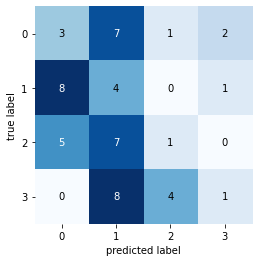

In [16]:

#plot_confusion_matrix(cm,classes=[0,1,2,3])
plot_confusion_matrix(cm,target_names)  

#plot_confusion_matrix(cm, figsize=(20, 20))